In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read2(dataset):
    """
    Read a dataset stored in a MATLAB .mat file.

    This function loads a dataset from a .mat file. It extracts the 'COD1', 'Xv1',
    and 't' variables from the file, combines 'COD1' and 'Xv1' to create the input data 'X', and uses 't' as the
    desired output 'Y'.

    Parameters:
    - dataset (str): Path to the .mat file containing the dataset.

    Returns:
    - numpy.ndarray: Original input data 'X'.
    - numpy.ndarray: Original desired output data 'Y'.

    """
    # Load the .mat file
    data = scipy.io.loadmat(dataset)

    # Access the 'COD1' variable data
    cod1 = data['COD1']
    # Access the 'Xv1' variable data
    Xv1 = data['Xv1']
    # Access the 't' variable data
    t = data['t']

    # Create the X array by combining cod1 and Xv1
    X = np.column_stack((cod1, t))

    # Create the Y desired array with t
    Y = Xv1

    return X, Y


def normalize(X, Y):
    """
    Normalize a dataset stored in a MATLAB .mat file.

    This function calculates the minimum and maximum values across all datasets, normalizes
    the data, and returns the normalized input-output pairs.

    Parameters:
    - dataset (str): Path to the .mat file containing the dataset.

    Returns:
    - numpy.ndarray: Normalized input data 'X_norm'.
    - numpy.ndarray: Normalized desired output data 'Y_norm'.
    """
    XY = np.column_stack((X,Y))

    # Find the maximum and minimum values across all three datasets
    max = np.max(XY, axis = 0)
    min = np.min(XY, axis = 0)
    XY_norm = (XY - min) / (max - min)

    # Create the X array by combining normalized cod1 and Xv1
    X_norm = XY_norm[:, :2]

    # Create the Y desired array with normalized t
    Y_norm = XY_norm[:, -1][:, np.newaxis]

    return X_norm, Y_norm

def sampling(X, Y, split = [0.6,0.2,0.2], plot=False):
        """
        Split and sample the dataset into training, testing, and validation sets.

        This function partitions the input dataset (X, Y) into three subsets: training, testing, and validation.
        The sizes of the subsets are determined by the specified proportions (60%, 20%, 20%). It also provides
        the option to create visualizations of the partitioned data if required.

        Parameters:
        - X (numpy.ndarray): Input data samples.
        - Y (numpy.ndarray): Desired output data corresponding to the input samples.
        - plot (bool): If True, generate visualizations of the partitioned data.

        Returns:
        - numpy.ndarray: Training input data.
        - numpy.ndarray: Training desired output data.
        - numpy.ndarray: Testing input data.
        - numpy.ndarray: Testing desired output data.
        - numpy.ndarray: Validation input data.
        - numpy.ndarray: Validation desired output data.
        - numpy.ndarray: Indexes of the training data points.
        - numpy.ndarray: Indexes of the testing data points.
        - numpy.ndarray: Indexes of the validation data points.
        """
        lenT, lent, lenV = round(len(X)*split[0]), round(len(X)*split[1]), round(len(X)*split[2])

        # Shuffle indexes to ensure uniqueness
        all_indexes = np.arange(len(X))
        np.random.shuffle(all_indexes)

        indT = all_indexes[:lenT]
        indt = all_indexes[lenT:lenT+lent]
        indV = all_indexes[lenT+lent:lenT+lent+lenV]

        T = X[indT]; YT = Y[indT]
        t = X[indt]; Yt = Y[indt]
        V = X[indV]; YV = Y[indV]

        if plot:
            _, axs = plt.subplots(3, 1, figsize=(8, 10))

            # Plot for the Training Set
            ax = axs[0]
            ax.plot(Y, X[:, 0], linestyle='-', color='darkgrey')
            ax.scatter(YT, T[:, 0], marker='*', color='black')
            ax.plot(Y, X[:, 1], linestyle='-', color='darkgrey')
            ax.scatter(YT, T[:, 1], marker='v', color='black')
            ax.set_title('Training set')
            ax.set_xlabel('t')
            ax.legend(['COD1', 'Sampled COD1', 'Xv1', 'Sampled Xv1'])

            # Plot for the Testing Set
            ax = axs[1]
            ax.plot(Y, X[:, 0], linestyle='-', color='darkgrey')
            ax.scatter(Yt, t[:, 0], marker='*', color='black')
            ax.plot(Y, X[:, 1], linestyle='-', color='darkgrey')
            ax.scatter(Yt, t[:, 1], marker='v', color='black')
            ax.set_title('Testing set')
            ax.set_xlabel('t')
            ax.legend(['COD1', 'Sampled COD1', 'Xv1', 'Sampled Xv1'])

            # Plot for the Validation Set
            ax = axs[2]
            ax.plot(Y, X[:, 0], linestyle='-', color='darkgrey')
            ax.scatter(YV, V[:, 0], marker='*', color='black')
            ax.plot(Y, X[:, 1], linestyle='-', color='darkgrey')
            ax.scatter(YV, V[:, 1], marker='v', color='black')
            ax.set_title('Validation set')
            ax.set_xlabel('t')
            ax.legend(['COD1', 'Sampled COD1', 'Xv1', 'Sampled Xv1'])

            # Set the title above the subplots
            plt.suptitle("Data Partitioning and Sampling", fontsize=16)
            plt.subplots_adjust(top=0.8)  # Adjust the position of the suptitle

            # Save and display the plot
            plt.tight_layout()
            plt.savefig('Data_Partitioning_and_Sampling.png')
            plt.show()

        return T, YT, t, Yt, V, YV, indT, indt, indV

In [21]:
# Read the dataset
X, Y = read2('datos.mat')

# Normalize dataset
X_norm, Y_norm = normalize(X, Y)

data = np.concatenate((X_norm, Y_norm), axis=1)

T, YT, t, Yt, V, YV, indT, indt, indV = sampling(X_norm, Y_norm, split = [0.6,0.2,0.2], plot=False)
Train = np.concatenate((T, YT), axis=1)
Test = np.concatenate((t, Yt), axis=1)
Validate = np.concatenate((V, YV), axis=1)


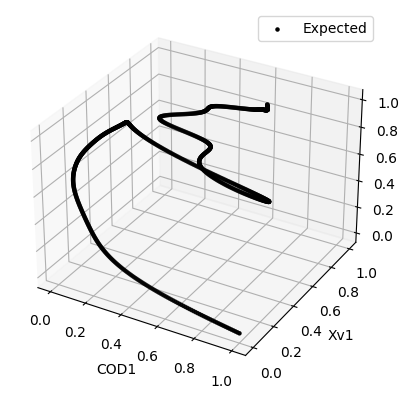

In [28]:

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z coordinates from "Expected" and "Predicted"
x_expected, y_expected, z_expected = data[:, 0], data[:, 1], data[:, 2]

ax.scatter(x_expected, y_expected, z_expected, c='black', marker='.', label='Expected')

# Set labels and a legend
ax.set_xlabel('COD1')
ax.set_ylabel('Xv1')
ax.set_zlabel('t')
ax.legend()

# Show the 3D plot
plt.show()

In [93]:
import keras

class Autoencoder(keras.Model):
    def __init__(self, input_shape=(3,)):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = keras.Sequential([
            keras.layers.Dense(10, activation='relu', input_shape=input_shape),
        ])

        # Decoder
        self.decoder = keras.Sequential([
            keras.layers.Dense(3, activation='linear'),
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# Create the autoencoder
autoencoder = Autoencoder()

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(Train, Train, epochs=200)
loss= autoencoder.evaluate(Train, Train)
Train_out = autoencoder.predict(Train)
print('Loss:', loss)

# Evaluate the autoencoder
loss= autoencoder.evaluate(Test, Test)
print('Loss:', loss)

Test_out = autoencoder.predict(Test)
#print('Accuracy:', accuracy)

Epoch 1/200
24/24 [==============================] - 0s 564us/step - loss: 0.1747
Epoch 2/200
24/24 [==============================] - 0s 531us/step - loss: 0.1056
Epoch 3/200
24/24 [==============================] - 0s 514us/step - loss: 0.0653
Epoch 4/200
24/24 [==============================] - 0s 453us/step - loss: 0.0440
Epoch 5/200
24/24 [==============================] - 0s 401us/step - loss: 0.0336
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 7/200
24/24 [==============================] - 0s 756us/step - loss: 0.0224
Epoch 8/200
24/24 [==============================] - 0s 411us/step - loss: 0.0182
Epoch 9/200
24/24 [==============================] - 0s 427us/step - loss: 0.0148
Epoch 10/200
24/24 [==============================] - 0s 417us/step - loss: 0.0122
Epoch 11/200
24/24 [==============================] - 0s 418us/step - loss: 0.0102
Epoch 12/200
24/24 [==============================] - 0s 399us/step - loss: 0.0086
Epoch 13/200
24

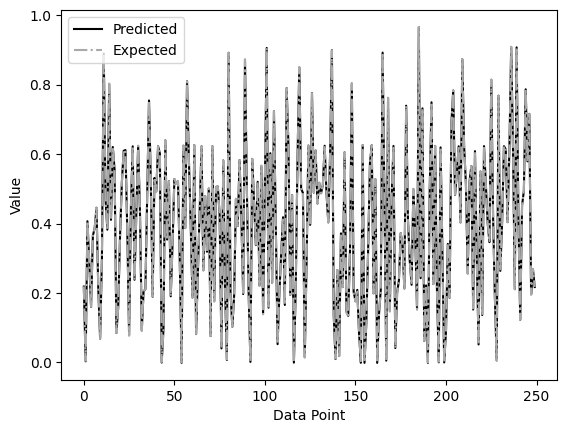

In [95]:

plt.plot(Test_out[:,0], color = 'black', linestyle = '-', label = 'Predicted')
plt.plot(Test[:,0], color = 'darkgrey', linestyle = '-.', label= "Expected")
plt.xlabel("Data Point")
plt.ylabel("Value")

# Show the plot
plt.legend()
plt.show()

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_3d(Expected, Predicted):
    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract x, y, and z coordinates from "Expected" and "Predicted"
    x_expected, y_expected, z_expected = Expected[:, 0], Expected[:, 1], Expected[:, 2]
    x_predicted, y_predicted, z_predicted = Predicted[:, 0], Predicted[:, 1], Predicted[:, 2]

    # Plot the "Expected" points in blue
    ax.scatter(x_expected, y_expected, z_expected, c='grey', marker='o', label='Expected')

    # Plot the "Predicted" points in red
    ax.scatter(x_predicted, y_predicted, z_predicted, c='black', marker='^', label='Predicted')

    # Set labels and a legend
    ax.set_xlabel('COD1')
    ax.set_ylabel('Xv1')
    ax.set_zlabel('t')
    ax.legend()

    # Show the 3D plot
    plt.show()

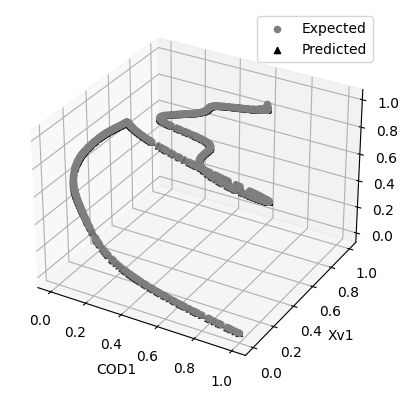

In [97]:
plot_3d(Train, Train_out)

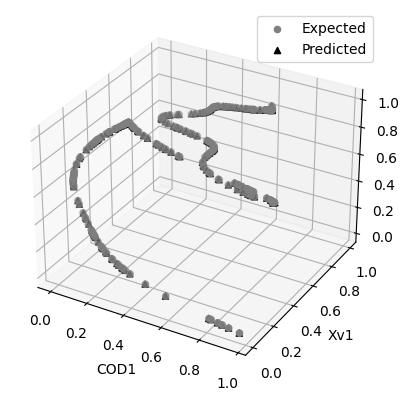

In [98]:
plot_3d(Test, Test_out)

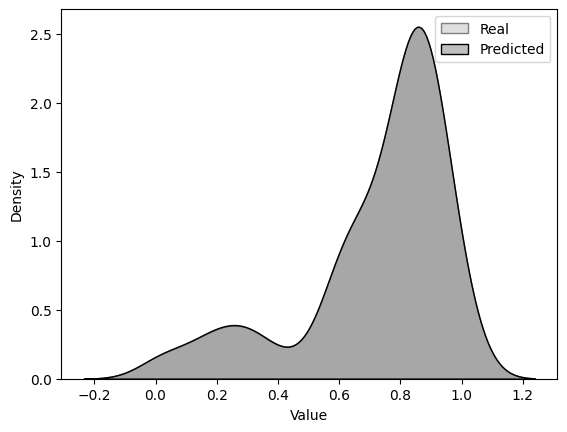

In [99]:
# Flatten the data for plotting (assuming you want to plot density for each feature)
Test_flat = Test[:,2].flatten()
Test_out_flat = Test_out[:,2].flatten()

# Create a density plot using seaborn
sns.kdeplot(Test_flat, fill=True, color="grey", label = "Real")
sns.kdeplot(Test_out_flat, fill=True, color="black", label = "Predicted")
plt.xlabel("Value")
plt.ylabel("Density")

# Show the plot
plt.legend()

plt.show()

In [100]:
# Evaluate the autoencoder
loss= autoencoder.evaluate(Validate, Validate)
print('Loss:', loss)

Validate_out = autoencoder.predict(Validate)

8/8 [==============================] - 0s 1ms/step - loss: 2.0943e-07
Loss: 2.0942958656178234e-07
8/8 [==============================] - 0s 1ms/step


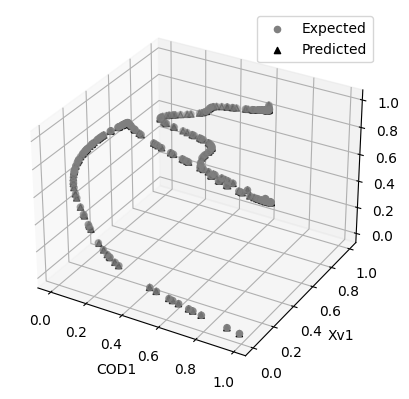

In [101]:
plot_3d(Validate, Validate_out)

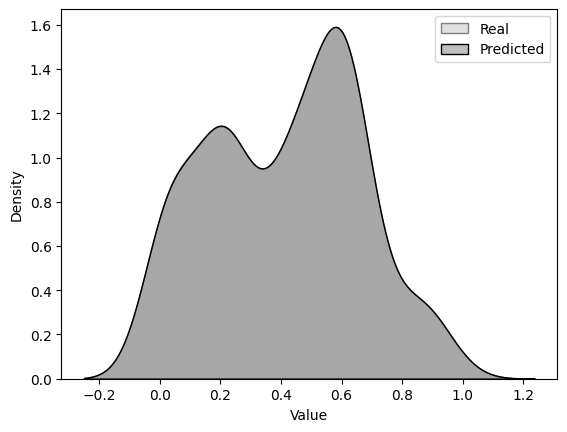

In [102]:
# Flatten the data for plotting (assuming you want to plot density for each feature)
Test_flat = Validate[:,0].flatten()
Test_out_flat = Validate_out[:,0].flatten()

# Create a density plot using seaborn
sns.kdeplot(Test_flat, fill=True, color="grey", label = "Real")
sns.kdeplot(Test_out_flat, fill=True, color="black", label = "Predicted")
plt.xlabel("Value")
plt.ylabel("Density")

# Show the plot
plt.legend()
plt.show()